# Setup
Specify the paths you chose for your models. Note: this will be relative to where
this notebook is.

In [2]:
import numpy as np
import json

from numpy import ndarray
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

BOUNDARY_PATH = "/home/bentoaz/SEMBAS/.results" # TODO set to the full path of your boundary folder


def subplot_3d():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return fig, ax

def draw_arrows(ax: Axes, locs: ndarray, dirs: ndarray, scale: float = 0.1):
    handles = []
    for bp, s in zip(locs, dirs):
        if is_3d:
            handles.append(ax.quiver(*bp, *(s * scale), color='black'))
        else:
            print(bp)
            print(s)
            handles.append(ax.arrow(*bp, *(s * scale), head_width=scale * 0.1, head_length=scale*0.2))

def subplot():
    if is_3d:
        fig, ax = subplot_3d()
    else:
        fig, ax = plt.subplots()

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return fig, ax
    
def load_boundary(i: int, prefix="boundary") -> ndarray:
    with open(f"{BOUNDARY_PATH}/{prefix}{i}.json") as f: # TODO
        data = json.load(f)
    return np.array(data['boundary']["boundary_points"]), np.array(data['boundary']["boundary_surface"])
    
# Load boundary
bpoints, bdir = load_boundary(0)

ndim = bdir.shape[1]
is_3d = ndim == 3

assert ndim <= 3, "Cannot visualize more than 3 dimensions"

print(len(bpoints.T))
print(bpoints.shape, bdir.shape)

# /home/bentoaz/SEMBAS/.results/boundary10.json

3
(500, 3) (500, 3)


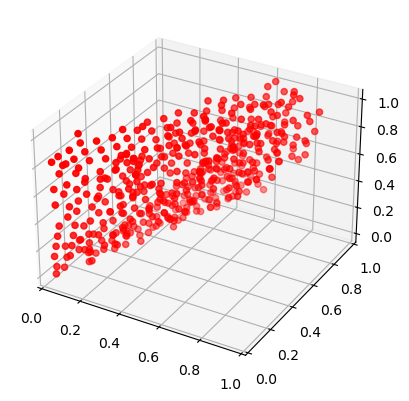

In [3]:
# # Show boundary
fig, ax = subplot()

ax.scatter(*bpoints.T, color="red")
plt.show()

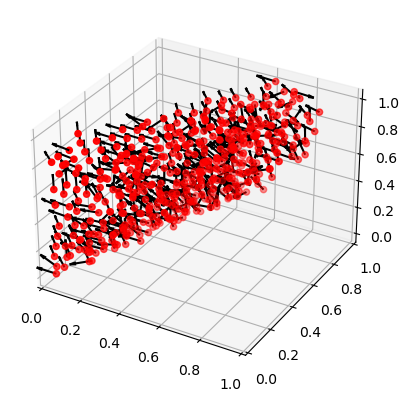

In [4]:
# show surface direction
fig, ax = subplot()

ax.scatter(*bpoints.T, color="red")
draw_arrows(ax, bpoints, bdir)
plt.show()